### Read the csv using pandas

In [104]:
import pandas as pd
Amazon = pd.read_csv('AMAZON_MOBILE_DATA.csv',nrows=100000)
# Read the csv using pandas
Amazon

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
99995,BlackBerry Storm 2 9550 Unlocked Phone - No Wa...,BlackBerry,79.99,3,This shipped on time. I purchased this for my ...,0.0
99996,BlackBerry Storm 2 9550 Unlocked Phone - No Wa...,BlackBerry,79.99,1,I travel outside the country a lot and prefer ...,4.0
99997,BlackBerry Storm 2 9550 Unlocked Phone - No Wa...,BlackBerry,79.99,5,I am enjoying my new phone when leaving the co...,0.0
99998,BlackBerry Storm 2 9550 Unlocked Phone - No Wa...,BlackBerry,79.99,1,I don't know what do me. I ordered Blackberry ...,8.0


### Printing count of null value present in each coloumn(attributes)

In [105]:
print("Number of the mobile phone dataset from Amazon: ", Amazon.shape)
print(Amazon.isnull().sum())

Number of the mobile phone dataset from Amazon:  (100000, 6)
Product Name        0
Brand Name      21487
Price            1876
Rating              0
Reviews            21
Review Votes     3248
dtype: int64


In [106]:
Amazon.dropna(subset=['Reviews'], inplace = True)

In [107]:
Amazon["Brand Name"].fillna(value = "Missing", inplace = True)
Amazon["Price"].fillna(value = 0, inplace = True)
Amazon["Review Votes"].fillna(value = 0, inplace = True)

In [108]:
Amazon.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [109]:
Amazon.drop(['Product Name','Price','Review Votes'], axis = 1, inplace = True)

In [110]:
Amazon.head()

,Brand Name,Rating,Reviews
0,Samsung,5,I feel so LUCKY to have found this used (phone...
1,Samsung,4,"nice phone, nice up grade from my pantach revu..."
2,Samsung,5,Very pleased
3,Samsung,4,It works good but it goes slow sometimes but i...
4,Samsung,4,Great phone to replace my lost phone. The only...


In [111]:
import pandas as pd
import nltk
from sklearn import metrics 
import sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [112]:
stopset = list(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents = 'ascii', stop_words=stopset)

In [113]:
y = Amazon.Rating

In [114]:
%%time
X = vectorizer.fit_transform(Amazon['Reviews'].values.astype('U'))

CPU times: total: 14.9 s
Wall time: 15 s


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\prngr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
#roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

In [118]:
prediction = model.predict(X_test)

In [119]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, prediction))
print('-'*80)
print('Accuracy', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           1       0.79      0.90      0.84      4731
           2       0.74      0.33      0.46      1193
           3       0.67      0.35      0.46      1423
           4       0.73      0.34      0.46      2868
           5       0.85      0.98      0.91     14780

    accuracy                           0.82     24995
   macro avg       0.76      0.58      0.63     24995
weighted avg       0.81      0.82      0.80     24995

--------------------------------------------------------------------------------
Accuracy 0.8221644328865774


In [120]:
Twitter = pd.read_csv('Twitter_Final_Data.csv')
# Read the csv using pandas
Twitter

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,...,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",...,donjazzy day 3 countdown seeking of birthday g...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective
5181,5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",...,download utg pro to get all video_games inform...,download utg pro get video_games information w...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download 

In [121]:
Twitter.drop(['Unnamed: 0'], axis = 1, inplace = True)
Twitter.head()

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,...,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity
0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.30,0.90,POSITIVE,objective
1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.16,0.54,POSITIVE,objective
2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.10,0.10,NEGATIVE,objective
3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.60,0.60,POSITIVE,objective
4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.00,0.00,NEUTRAL,subjective


In [122]:
#Twitter['Naive_Bayes_output'] = vectorizer.transform(Twitter['text_lemmatized'])
import numpy as np
#review_twitter = np.array(["calling teacher get personalised phone case also work well new teacher gift 1dzo9d99mz womaninbizhour inbizhour yourbizhour maker bizbubble craftbizparty pixel6 samsungs22ultra iphone13promax dokkaysi9c"])
#review_twitter = np.array(["I already had a phone with problems... I know it stated it was used, but dang, it did not state that it did not charge. I wish I would have read these comments then I would have not purchased this item.... and its cracked on the side.. damaged goods is what it is.... If trying to charge it another way does not work I am requesting for my money back... AND I WILL GET MY MONEY BACK...SIGNED AN UNHAPPY CUSTOMER...."])
review_twitter = np.array(Twitter['text_lemmatized'])
review_twitter_vector = vectorizer.transform(review_twitter)
Twitter['Logistic_Regression_Output'] = model.predict(review_twitter_vector)

In [123]:
Twitter

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,...,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity,Logistic_Regression_Output
0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective,5
1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective,5
2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective,5
3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective,5
4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",#iphone11,...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective,5
5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",#iphone11,...,download utg pro get video_games information w...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_game information wan...,0.400000,0.400000,POSITIVE,objective,4
5182,kiddzillastudio,Missing,Missing,4,0,2,0,Legends Never Die. Our New iPhone Case design ...,"['iphone11', 'phone12', 'iphone13', 'iphone14'...",#iphone11,...,legends never die new iph

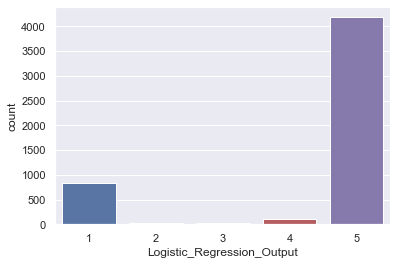

In [124]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Logistic_Regression_Output", data=Twitter)

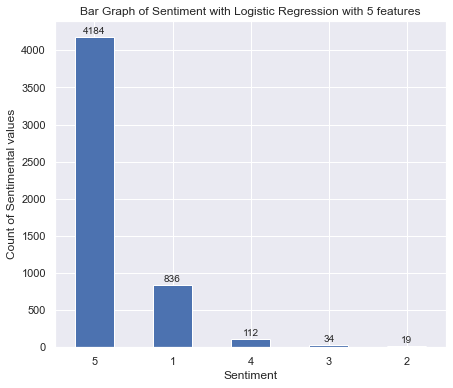

In [125]:
import matplotlib.pyplot as plt
Sentiment = Twitter['Logistic_Regression_Output'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Sentiment with Logistic Regression with 5 features", y = 1)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count of Sentimental values')
ax.set_xticklabels(('5', '1', '4', '3', '2'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [126]:
def sentiment(value):
    if value > 4:
        return 'POSITIVE'
    if value < 3:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

In [127]:
Twitter['Sentiment_Logistic']=Twitter['Logistic_Regression_Output'].apply(sentiment)

In [128]:
Twitter.head()

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,...,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity,Logistic_Regression_Output,Sentiment_Logistic
0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.30,0.90,POSITIVE,objective,5,POSITIVE
1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.16,0.54,POSITIVE,objective,5,POSITIVE
2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.10,0.10,NEGATIVE,objective,5,POSITIVE
3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.60,0.60,POSITIVE,objective,5,POSITIVE
4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.00,0.00,NEUTRAL,subjective,5,POSITIVE


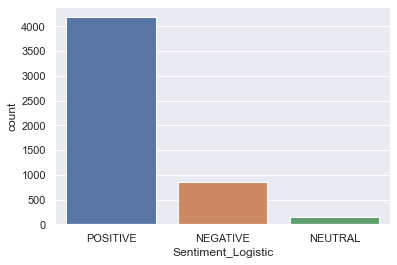

In [129]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Sentiment_Logistic", data=Twitter)

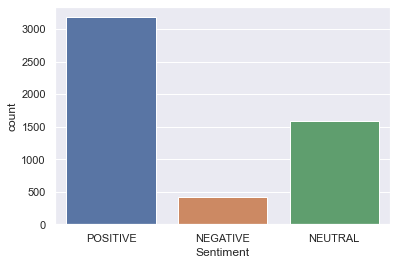

In [130]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Sentiment", data=Twitter)

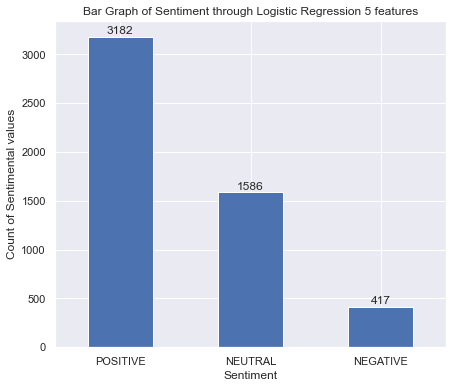

In [131]:
import matplotlib.pyplot as plt
Sentiment = Twitter['Sentiment'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Sentiment through Logistic Regression 5 features", y = 1)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count of Sentimental values')
ax.set_xticklabels(('POSITIVE', 'NEUTRAL', 'NEGATIVE'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

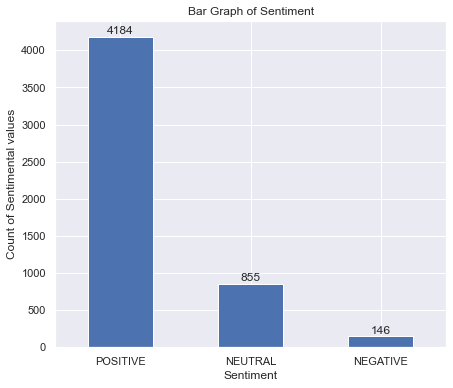

In [132]:
import matplotlib.pyplot as plt
Sentiment = Twitter['Sentiment_Logistic'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Sentiment", y = 1)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count of Sentimental values')
ax.set_xticklabels(('POSITIVE', 'NEUTRAL', 'NEGATIVE'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()